# Método Bootstrap
Josué
---
*Motivación*: Es dificil o casi imposible determinar la función densidad del estimador de alguna cantidad.

La idea del bootstrap es que puede realizar inferencia acerca de una población, utilizando remuestreos de una muestra aleatoria y haciendo inferencia acerca de la muestra aleatoria en base a los remuestreos.

## Ejemplo.
Supongamos que estamos interesados en la media poblacional de la altura de las personas de todo el mundo. Dado que no se puede medir a todo el mundo, se realiza una muestra aleatoria de tamaño $N$, se toma la altura de esas personas y podemos obtener una media muestral de esa m.a.

Para poder realizar inferencia sobre la población mundial, se necesita cierta noción de la variablilidad de la media muestral disponible. El método bootstrap lo que hace es generar $N_{boot}$ remuestreos con remplazo de la muestra aleatoria, y a estos remuestreos se les calcula la media muestral ("estimador de bootstrap"). El resultado es $N_{boot}$ estimadores de bootstrap de la media muestral. El histograma de estos $N_{boot}$ estimadores, da un estimado sobre la forma de la distribución de la media muestral.

Dado una m.a de tamaño $N$, $X = \{X_1, X_2, \ldots, X_N\}$, donde cada $X_k \sim F$. El método bootstrap sigue los siguientes pasos:

- Se genera una muestra con remplazamiento $X_i$ de tamaño $N$ a partir de $X$
- Para cada muestra $X_i$, se calculan los prámetros de interés $g(X_i)$
- Este proceso se realiza varias veces. Digamos $N_{boot}$.
- Al final, los $g(X_i)$ parámetros obtenidos, estiman la distribución del parámetro $g(X)$ de intrés.

## Ejemplo, ditribución Beta
Si $X_k \sim Beta(3,2)$, entonces $\mathbb{E}(X_k) = 3/5$. Queremos obtener la desviación estándar de la media muestral.

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
rv = stats.beta(3,2)
Xs = rv.rvs(50)

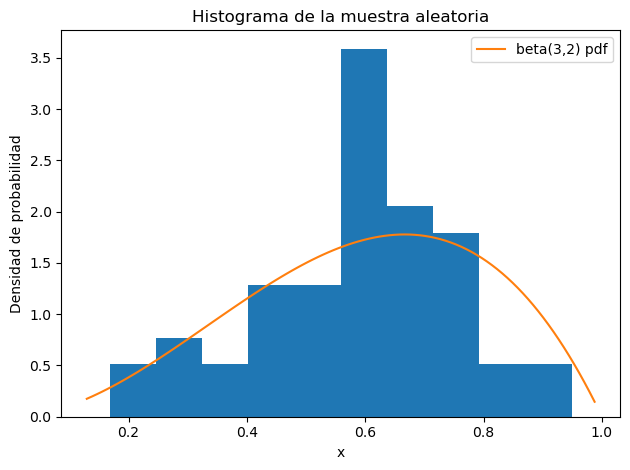

In [3]:
fig, ax = plt.subplots()

ax.hist(Xs, density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.beta.pdf(x, 3, 2)
plt.plot(x,p,label='beta(3,2) pdf')

ax.set_xlabel('x')
ax.set_ylabel('Densidad de probabilidad')
ax.set_title('Histograma de la muestra aleatoria')
ax.legend(loc='best')
fig.tight_layout()
plt.show()

In [4]:
yboot = np.random.choice(Xs,(100,50))
yboot_med = yboot.mean() #media calculada usando todos los elementos de yboot

In [5]:
yboot_med

0.5875275491233699

In [6]:
np.std(yboot.mean(axis=1)) #estimador de bootstrap de la deesviación estándar de la media muestral

0.023562429952448744

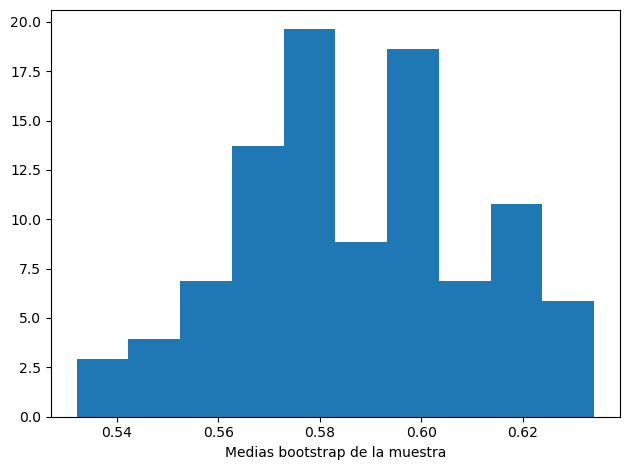

In [7]:
fig, ax = plt.subplots()

ax.hist(yboot.mean(axis=1), density=True)

ax.set_xlabel('Medias bootstrap de la muestra')
fig.tight_layout()
plt.show()

In [8]:
import sympy as S
import sympy.stats

In [9]:
for i in range(50): # 50 muestras
    # load sympy.stats Beta random variables
    # into global namespace using exec
    execstring = "x%d = S.stats.Beta('x'+str(%d),3,2)"%(i,i)
    exec(execstring) 

# populate xlist with the sympy.stats random variables
# from above
xlist = [eval('x%d'%(i)) for i in range(50) ]
# compute sample mean
sample_mean = sum(xlist)/len(xlist)
# compute expectation of sample mean
sample_mean_1 = S.stats.E(sample_mean).evalf()
# compute 2nd moment of sample mean
sample_mean_2 = S.stats.E(S.expand(sample_mean**2)).evalf()
# standard deviation of sample mean
# use sympy sqrt function
sigma_smn = S.sqrt(sample_mean_2-sample_mean_1**2) # sqrt(2)/50
print(sigma_smn)

0.0282842712474623


In [10]:
np.sqrt(2)/50

0.0282842712474619

## Ejemplo: método delta vs. bootstrap

Suponemos $n$ lanzamientos de moneda tipo Bernoulli con parámetro $p$. Sabemos que el estimador de máxima verosimilittud es $\hat{p} = \sum X_i / n$; además de que es un eestimador insesgado, $\mathbb{E}(\hat{p}) = p$ y $\text{Var}(\hat{p}) = p(1-p)/n$.

*Objetivo*: usar los datos de la muestra aleatoria para estimar la varianza de los experimentos Bernoulli ($\text{Var}(X) = p(1-p)$)

De acuerdo al método delta, $g(x) = x(1-x)$, y entonces el e.m.v para la variannza sería: $\hat{p}(1-\hat{p})$. La varianza de esta cantidad es:
$$\text{Var}(g(\hat{p})) = (1-2\hat{p})^{2}\frac{\hat{p}(1-\hat{p})}{n}$$

In [11]:
p = 0.25 # true head-up probability
x = stats.bernoulli(p).rvs(10)
print(x)

[0 0 1 0 1 0 0 1 0 0]


In [12]:
phat = x.mean()
print(phat)

0.3


In [13]:
print((1-2*phat)**2*(phat)**2/10)

0.0014400000000000003


In [14]:
phat_b = np.random.choice(x,(50,10)).mean(1)
print(np.var(phat_b*(1-phat_b)))

0.0034827599999999992


In [15]:
from sympy.stats import E, Bernoulli

In [16]:
xdata =[Bernoulli(i,p) for i in S.symbols('x:10')]
ph = sum(xdata)/float(len(xdata))
g = ph*(1-ph)

In [17]:
print(E(g**2) - E(g)**2)

0.00442968750000000


La estimación por bootstrap es más cercana al verdadero valor.

# Bootstrap parámetrico

- Se asume que la muestra aleatoria proviene de una distribución en particular.
- Se estiman los parámetros de esa distribución mediante la m.a.
- Se usa el método bootstrap para generar muestras aleatorias de esa dsitribución supuesta con los parámetros estimados.

Como ejemplo consideramos la siguiente distrtibución normal:

In [18]:
n = 100
rv = stats.norm(0,2)
Xs = rv.rvs(n)
# estimar media y varianza de Xs
mn_ = np.mean(Xs)
std_ = np.std(Xs)

rvb = stats.norm(mn_,std_) #distribución con los parámetros estimados
yboot = rvb.rvs((n,500)).var(axis=0) #bootstrap

Sabemos que la varianza muestral es
$$S^2 = \frac{1}{n-1} \sum (X_i-\bar{X})^2;$$
y además $(n-1)S^2/\sigma^2 \sim \chi^{2}_{n-1}$. Por lo tanto, $\text{Var}(S^2) = 2\sigma^4 / (n-1)$. Entonces, el estimador de m.v para esta varianza sería: $\text{Var}(S^2) = 2\sigma^4 / (n-1)$

In [19]:
# estimador m.v para la varianza de la media muestral
print(2*std_**4/(n-1))
# estimador bootstrap...
print(yboot.var())
# verdadero valor...
print(2*(2**4)/(n-1))

0.4803158365999152
0.4694753810754795
0.32323232323232326


# Referencias

- Unpingco, J. (2019). Python for probability, statistics, and machine learning. En Springer eBooks. https://doi.org/10.1007/978-3-030-18545-9
- Bonamente, M. (2013). Statistics and analysis of scientific data. En Graduate texts in physics. https://doi.org/10.1007/978-1-4614-7984-0

Otros que encontré
- The Jackknife and Bootstrap - Jun Shao, Springer.
- Bootstrap Methods: A Guide for Practitioners and Researchers - MICHAEL R. CHERNICK, Wiley